In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import pystan

# Call center data set – exponential likelihood with a gamma prior


In [ ]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt(
    'https://course-resources.minerva.kgi.edu/uploaded_files/mke/'
    '00124343-8397/call-center.csv')

# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

In [ ]:
waiting_times_hour = waiting_times_per_hour[13] #select the 13th hour

In [ ]:
stan_code = """
data {  
    int<lower=0> num_calls;                 // number of calls during the 13th hour
    vector[num_calls] waiting_times_hour;   // call waiting times
    real<lower=0> alpha;                    // alpha prior
    real<lower=0> beta;                     // beta prior
}

parameters {
    real lambda; // exponential distribution parameter                            
}

model {
    lambda ~ gamma(alpha, beta);              // prior over lambda
    waiting_times_hour ~exponential(lambda);  // likelihood function
}

"""


In [ ]:
call_center_stan = pystan.StanModel(model_code=stan_code) # compile the model


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05d7dc0147869fbebc134003e5a4af8f NOW.


In [ ]:
#assign values to the known quantities
model1_data = {
        'alpha': 1, 
        'beta': 0.25, 
        'waiting_times_hour': waiting_times_hour, 
        'num_calls':len(waiting_times_hour)
}

In [ ]:
results = call_center_stan.sampling(data=model1_data)
print(results)

Inference for Stan model: anon_model_05d7dc0147869fbebc134003e5a4af8f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.36  8.6e-3   0.33   5.73   6.14   6.35   6.58   7.03   1445    1.0
lp__   322.56    0.02   0.71 320.53 322.41 322.84 323.03 323.08   1838    1.0

Samples were drawn using NUTS at Fri Feb 18 03:56:28 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
#extract results to generate posterior samples
samples = results.extract()
samples

OrderedDict([('lambda',
              array([5.96921345, 5.96232575, 5.95029709, ..., 5.97523569, 6.2404295 ,
                     6.42968357])),
             ('lp__',
              array([322.42141252, 322.39584857, 322.34998048, ..., 322.44334753,
                     323.03526865, 323.03213235]))])

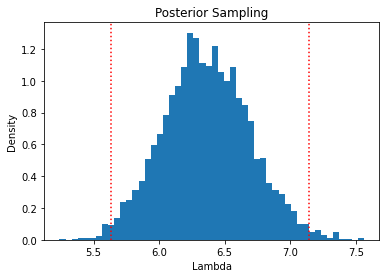

98% confidence interval for Lambda [5.63153352 7.14472333]


In [ ]:
#plot Posterior 98% confidence interval over lambda

confint = np.percentile(samples['lambda'], [1, 99]) # calculate confidence intervals

plt.figure()
plt.hist(samples['lambda'], bins=50, density=True)
plt.axvline(x=confint[0], linestyle=':', color='red')
plt.axvline(x=confint[1], linestyle=':', color='red')
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.title("Posterior Sampling")
plt.show()

print("98% confidence interval for Lambda", confint)

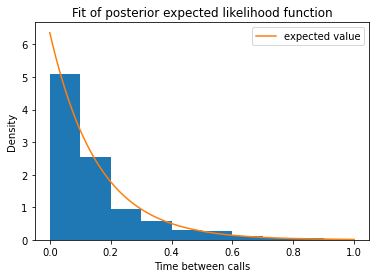

In [ ]:
#plot histogram of posterior samples

lambda_ = np.mean(samples['lambda']) #mean of lambda

plt.figure()
plt.hist(waiting_times_hour, density=True)
x = np.linspace(0, max(waiting_times_hour), 200)
y = sts.expon.pdf(x, scale=1/lambda_)
plt.plot(x, y, label='expected value')
plt.ylabel("Density")
plt.xlabel("Time between calls")
plt.title("Fit of posterior expected likelihood function")
plt.legend()
plt.show()

# Normal likelihood with normal-inverse-gamma prior

In [ ]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data")

200 data


In [ ]:
stan_code2 = """

data {
    int<lower=0> n;   
    vector[n] dataset;

    real<lower=0> mu;       // mu prior       
    real<lower=0> nu;       // nu prior       
    real<lower=0> alpha;    // alpha prior    
    real<lower=0> beta;     // beta prior      
}

parameters {
    real sigma2;      // variance      
    real avg;           // mean           
}

model {
    sigma2 ~ inv_gamma(alpha, beta);    
    avg ~ normal(mu, sigma2/nu);          
    dataset ~ normal(avg, sqrt(sigma2));   
}

"""


In [ ]:
nig_stan = pystan.StanModel(model_code=stan_code2) #compile code

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e43f5983bc2bb8e288c6d7aafb4dd0c2 NOW.


In [ ]:
#assign values to the known quantities
model2_data = {
    "n": len(data),
    "dataset": data,
    "mu": 0,         
    "nu": 0.054,    
    "alpha": 1.12,   
    "beta": 0.4,     
}


In [ ]:
results2 = nig_stan.sampling(data=model2_data)
print(results2)

Inference for Stan model: anon_model_e43f5983bc2bb8e288c6d7aafb4dd0c2.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma2   3.59  6.9e-3   0.37   2.92   3.33   3.56   3.82   4.39   2856    1.0
avg      3.06  2.4e-3   0.13    2.8   2.97   3.06   3.16   3.32   3030    1.0
lp__   -236.5    0.03   1.03 -239.3 -236.9 -236.2 -235.8 -235.5   1622    1.0

Samples were drawn using NUTS at Fri Feb 18 05:30:53 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
#extract results to generate posterior samples
samples2 = results2.extract()
samples2

OrderedDict([('sigma2',
              array([3.46047727, 3.07379271, 3.56984567, ..., 3.28340288, 3.52499997,
                     4.01453901])),
             ('avg',
              array([3.01276306, 2.86738217, 3.01161042, ..., 3.12214442, 2.99891556,
                     2.79578974])),
             ('lp__',
              array([-235.59995127, -237.73053739, -235.60533433, ..., -235.84414502,
                     -235.63563149, -238.20732873]))])

In [ ]:
# Calculate confidence intervals
print('Mean 95% confidence interval:', np.percentile(samples2['avg'], [2.5, 97.5]))
print('Variance 95% confidence interval:', np.percentile(samples2['sigma2'], [2.5, 97.5]))

Mean 95% confidence interval: [2.80149355 3.31883379]
Variance 95% confidence interval: [2.92435571 4.38885176]


In [ ]:
#take 10 random samples from the posterior over mean and variance
means = np.random.choice(samples2['avg'], size=(10,))
vars = np.random.choice(samples2['sigma2'], size=(10,))

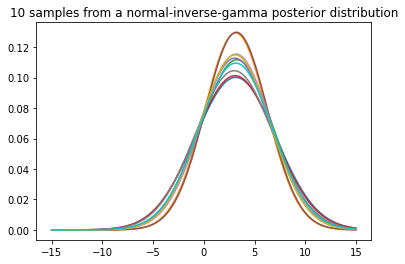

In [ ]:
x = np.linspace(-15, 15, 500)

plt.figure()
for i, j in enumerate(zip(means, vars)):
  plt.plot(x, sts.norm.pdf(x, j[0], j[1]))
plt.title("10 samples from a normal-inverse-gamma posterior distribution")
plt.show()

# Log-normal HRTEM data

In [ ]:
# Load data: read the particle sizes (in nanometers) from a CSV file.
data = np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv')
print('%i data, min: %f, max: %f' % (len(data), min(data), max(data)))

500 data, min: 1.051827, max: 28.942578


In [ ]:
#transform into log data
log_data = np.log(data)

#because it's the same distributions we can reuse the previous stan code
#so there is no need to compile the model again

model3_data = {
    "n": len(log_data),
    "dataset": log_data,
    "mu": 2.3,         
    "nu": 0.1,    
    "alpha": 2,   
    "beta": 5,     
}

In [ ]:
results3 = nig_stan.sampling(data=model3_data)
print(results3)

Inference for Stan model: anon_model_e43f5983bc2bb8e288c6d7aafb4dd0c2.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma2    0.5  6.4e-4   0.03   0.44   0.47    0.5   0.52   0.56   2371    1.0
avg      1.89  5.8e-4   0.03   1.83   1.87   1.89   1.91   1.96   3051    1.0
lp__   -76.11    0.03   1.02  -79.0 -76.51 -75.78 -75.38 -75.11   1664    1.0

Samples were drawn using NUTS at Fri Feb 18 05:48:37 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
#extract results to generate posterior samples
samples3 = results3.extract()
samples3

OrderedDict([('sigma2',
              array([0.58717483, 0.53532254, 0.5131602 , ..., 0.5495415 , 0.49884714,
                     0.48462228])),
             ('avg',
              array([1.88965129, 1.86273311, 1.86200392, ..., 1.86247234, 1.8834319 ,
                     1.9298223 ])),
             ('lp__',
              array([-79.011541  , -76.46412563, -75.80382235, ..., -77.10401282,
                     -75.16843953, -75.82811987]))])

In [ ]:
# Calculate confidence intervals
print('Mean 95% confidence interval:', np.percentile(samples3['avg'], [2.5, 97.5]))
print('Variance 95% confidence interval:', np.percentile(samples3['sigma2'], [2.5, 97.5]))

Mean 95% confidence interval: [1.8291583  1.95500146]
Variance 95% confidence interval: [0.43924023 0.56223128]


In [ ]:
#take 10 random samples from the posterior over mean and variance
samples_i = np.random.randint(4000,size=10)
means = samples3['avg'][samples_i]
vars = samples3['sigma2'][samples_i]

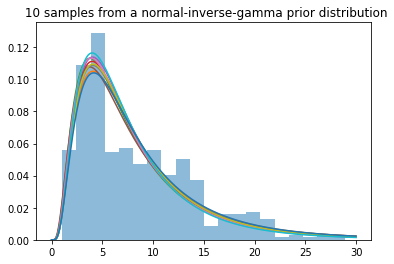

In [ ]:
plt.hist(data, bins=20, density=True, alpha =0.5)
plot_x = np.linspace(0, 30, 500)
for i in range(10):
    plot_y = sts.lognorm.pdf(plot_x, np.sqrt(vars[i]), scale=np.exp(means[i]))
    plt.plot(plot_x, plot_y)
plt.title(' 10 samples from a normal-inverse-gamma prior distribution')
plt.show()